<a href="https://colab.research.google.com/github/Karosemi/MLPnetwork/blob/master/NNmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary modules and data

In [0]:
import numpy as np
import pandas as pd
import sklearn
import keras
import seaborn
import matplotlib.pyplot as plt
import tensorflow
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
!pip install -q keras_metrics
import keras_metrics
from sklearn.model_selection import cross_validate
!pip install livelossplot
from livelossplot import PlotLossesKeras
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from keras.layers import Dropout
from sklearn.metrics import precision_recall_fscore_support as score
import random
from IPython.display import Image

In [0]:
url = 'https://raw.githubusercontent.com/Dalthirr/NeuralNetworks/master/Churn_Modelling.csv'
df=pd.read_csv(url) #Pobieranie danych
df = df.drop(["CustomerId", "Surname", "RowNumber"],
        axis=1)
df = pd.concat([df, pd.get_dummies(df[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df[["Gender", "Geography"]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Gender_Male          10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


## Tworzymy zbiór treningowy i testowy, standaryzujemy i stratyfikujemy odpowiednio do proporcji etykiet

In [0]:
X=df.drop(['Exited'], axis=1)
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

scaler=StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

X_std=scaler.transform(X)




## Modele

### Tomasz Sołtysiak

Zbuduję przykładową sieć, któa składa się z warstwy wejściowej, jednej warstwy ukrytej i  warstwy wyjściowej.
Kompilujemy model przy użyciu 

loss_function='binary_crossentropy';

optimizer='Adam'.


Naszą główną metryką będzie **precyzja** oznaczająca procent osób prawidłowie określonych jako zagrożone odejściem.

In [0]:
# Pierwsze podejście do modelu
# Creating Model, I will build simple networt using Sequential.
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(121, activation='relu'))



# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
model.fit(X_train_std, y_train,epochs=3, batch_size=1, verbose=1,validation_data=(X_test,y_test))

model.evaluate(X_test_std,y_test)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 6700 samples, validate on 3300 samples
Epoch 1/3
6700/6700 [==============================] - 29s 4ms/step - loss: 0.4279 - precision: 0.6221 - acc: 0.8164 - val_loss: 8.4914 - val_precision: 0.2446 - val_acc: 0.4679
Epoch 2/3
6700/6700 [==============================] - 28s 4ms/step - loss: 0.3592 - precision: 0.7384 - acc: 0.8531 - val_loss: 12.5462 - val_precision: 0.2054 - val_acc: 0.2130
Epoch 3/3
3300/3300 [==============================] - 0s 48us/step


[0.34157105026823104, 0.8269794718982464, 0.8639393939393939]

In [0]:
#Sprawdźmy skuteczność naszej predykcji - raportem klasyfikacyjnym
y_pred=model.predict_classes(X_test_std)
report=classification_report(y_test,y_pred)
report1=classification_report(y_test,y_pred,output_dict=True)
print(report)
print(report1['0']['precision'])


              precision    recall  f1-score   support

           0       0.87      0.98      0.92      2628
           1       0.83      0.42      0.56       672

    accuracy                           0.86      3300
   macro avg       0.85      0.70      0.74      3300
weighted avg       0.86      0.86      0.85      3300

0.8681987157823589


In [0]:
#Sprawdźmy, jak prezentują się wyniki w zależności od liczby
#neuronów w warstwie ukrytej.
nodes=[10,30,50,70,90,110]
wyniki={}
for i in nodes:
  model=0
# Creating Model, I will build simple networt using Sequential.
  model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
  model.add(Dense(11, activation='relu', input_shape=(11,)))

# Add one hidden layer 
  model.add(Dense(i, activation='relu'))



# Add an output layer 
  model.add(Dense(1, activation='sigmoid'))


  model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
  model.fit(X_train_std, y_train,epochs=5, batch_size=1, verbose=1,validation_data=(X_test,y_test))
  print("Zakończono trenowanie modelu z {0} węzłami.".format(i))
  model.evaluate(X_test_std,y_test)
  y_pred=model.predict_classes(X_test_std)
  report=classification_report(y_test,y_pred,output_dict=True)
  wyniki.update({i: [report['0']['precision'],report['1']['precision']]})

print(wyniki)
  
  

Train on 6700 samples, validate on 3300 samples
Epoch 1/5
6700/6700 [==============================] - 28s 4ms/step - loss: 0.4348 - precision: 0.6124 - acc: 0.8146 - val_loss: 3.2822 - val_precision: 0.0000e+00 - val_acc: 0.7964
Epoch 2/5
6700/6700 [==============================] - 27s 4ms/step - loss: 0.3645 - precision: 0.7334 - acc: 0.8499 - val_loss: 7.4143 - val_precision: 0.1316 - val_acc: 0.5367
Epoch 3/5
6700/6700 [==============================] - 27s 4ms/step - loss: 0.3551 - precision: 0.7322 - acc: 0.8527 - val_loss: 7.4467 - val_precision: 0.1308 - val_acc: 0.5345
Epoch 4/5
6700/6700 [==============================] - 28s 4ms/step - loss: 0.3504 - precision: 0.7466 - acc: 0.8561 - val_loss: 3.3261 - val_precision: 0.0769 - val_acc: 0.7897
Epoch 5/5
6700/6700 [==============================] - 27s 4ms/step - loss: 0.3471 - precision: 0.7444 - acc: 0.8548 - val_loss: 7.4578 - val_precision: 0.1305 - val_acc: 0.5339
Zakończono trenowanie modelu z 10 węzłami.
3300/3300 [====

In [0]:
#Wybieramy model z 90 węzłami - dał najlepsze wyniki
from keras.callbacks import EarlyStopping
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', input_shape=(11,)))
model.add(Dropout(0.1,))
# Add one hidden layer 
model.add(Dense(90, activation='relu'))



# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
early_stopping_monitor = EarlyStopping(patience=2)
model.fit(X_train_std, y_train,epochs=30, batch_size=1, verbose=1,validation_data=(X_test,y_test),callbacks=[early_stopping_monitor])

model.evaluate(X_test_std,y_test)
y_pred=model.predict_classes(X_test_std)
report=classification_report(y_test,y_pred)
report1=classification_report(y_test,y_pred,output_dict=True)
print(report)

                                       
                                    

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 6700 samples, validate on 3300 samples
Epoch 1/30
6700/6700 [==============================] - 30s 4ms/step - loss: 0.4421 - precision: 0.6325 - acc: 0.8148 - val_loss: 8.4914 - val_precision: 0.2446 - val_acc: 0.4679
Epoch 2/30
6700/6700 [==============================] - 30s 4ms/step - loss: 0.3851 - precision: 0.7070 - acc: 0.8397 - val_loss: 8.4865 - val_precision: 0.2449 - val_acc: 0.4682
Epoch 3/30
6700/6700 [==============================] - 29s 4ms/step - loss: 0.3688 - precision: 0.7201 - acc: 0.8467 - val_loss: 8.4914 - val_precision: 0.2446 - val_acc: 0.4679
Epoch 4/30
6700/6700 [==============================] - 29s 4ms/step - loss: 0.3653 - precision: 0.7208 - acc: 0.8487 - val_loss: 8.4627 - val_precision: 0.2443 - val_acc: 0.4697
Epoch 5/30
6700/6700 [==============================] - 29s 4ms/step - loss: 0.3642 - precision: 0.7346 - acc: 0.8496 - v

## Paweł Bogdan

In [0]:
#Wczytuję dane - tym razem wyrzucam również informację odnośnie
#posiadania karty kredytowej - korelacja ze zmienną objaśnianą
#wynosiła 0.0003
df2=pd.read_csv(url).drop(["CustomerId", "Surname", "RowNumber", "HasCrCard"],
        axis=1)
df2 = pd.concat([df2, pd.get_dummies(df2[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df2[["Gender", "Geography"]], axis=1)

X2=df2.drop(['Exited'], axis=1)
y2=df2['Exited']

X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42,stratify=y2)


scaler2=StandardScaler().fit(X_train2)
X_train_std2 = scaler2.transform(X_train2)

X_test_std2 = scaler2.transform(X_test2)

X_std2=scaler2.transform(X2)

#Poza standaryzacja i stratyfikacją zbioru treningowego i testowego
#ustalam również wagi dla danych klas
class_weight = {
                0: 3.,
                1: 1.
               }

es = EarlyStopping(monitor='val_precision', mode='max', verbose=1, patience = 3)




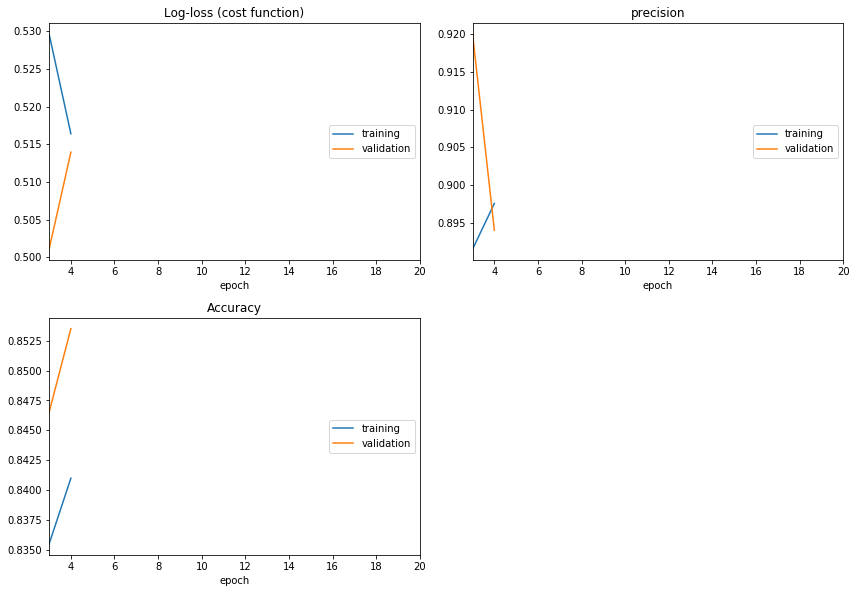

Log-loss (cost function):
training   (min:    0.516, max:    0.642, cur:    0.516)
validation (min:    0.501, max:    0.565, cur:    0.514)

precision:
training   (min:    0.787, max:    0.898, cur:    0.898)
validation (min:    0.894, max:    0.933, cur:    0.894)

Accuracy:
training   (min:    0.801, max:    0.841, cur:    0.841)
validation (min:    0.807, max:    0.854, cur:    0.854)
Epoch 00004: early stopping


In [0]:
#Buduję pierwszy model - w callbacku korzystam z metody
#PlotLossesKeras(), która umożliwi nam tworzenie interesujących nas
#wykresów danych metryk w czasie rzeczywistym
#korzystam również z early stopping zdefiniowanego wyżej, aby nie dopuścić
#do przetrenowania modelu
model2=Sequential()
model2.add(Dense(20, activation='relu', input_shape=(10,)))


model2.add(Dropout(0.1,))
model2.add(Dense(75, activation='relu'))


model2.add(Dense(1, activation='sigmoid'))


model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[keras_metrics.precision(),'accuracy'])
                   
model2.fit(X_train_std2, y_train2,epochs=20, batch_size=2, verbose=1, validation_split = 0.25, callbacks = [PlotLossesKeras(), es], class_weight=class_weight)



In [0]:
#Sprawdźmy predykcję i wygenerujmy raport klasyfikacyjny
y_pred2=model2.predict_classes(X_test_std2)

report=classification_report(y_test2,y_pred2,output_dict=False)
print(report)

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1593
           1       0.88      0.29      0.44       407

    accuracy                           0.85      2000
   macro avg       0.86      0.64      0.68      2000
weighted avg       0.85      0.85      0.82      2000



### Patrycja Studzienna i Karolina Schmidt

In [0]:
url = 'https://raw.githubusercontent.com/Dalthirr/NeuralNetworks/master/Churn_Modelling.csv'
df=pd.read_csv(url) #Pobieranie danych
df = df.drop(["CustomerId", "Surname", "RowNumber"],
        axis=1)
df = pd.concat([df, pd.get_dummies(df[["Gender", "Geography"]], drop_first=True)],
               sort=False, axis=1).drop(df[["Gender", "Geography"]], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
CreditScore          10000 non-null int64
Age                  10000 non-null int64
Tenure               10000 non-null int64
Balance              10000 non-null float64
NumOfProducts        10000 non-null int64
HasCrCard            10000 non-null int64
IsActiveMember       10000 non-null int64
EstimatedSalary      10000 non-null float64
Exited               10000 non-null int64
Gender_Male          10000 non-null uint8
Geography_Germany    10000 non-null uint8
Geography_Spain      10000 non-null uint8
dtypes: float64(2), int64(7), uint8(3)
memory usage: 732.5 KB


In [0]:
X=df.drop(['Exited'], axis=1)
y=df['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,stratify=y)

scaler=StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)

X_test_std = scaler.transform(X_test)

X_std=scaler.transform(X)

**Equalising the subsets**

In [0]:
df = df.drop(["HasCrCard"],
        axis=1)
#empty list for index
random_list = []
for i in range(len(df.values)):
  #sampling from uniform distribution 
  if (df['Exited'].values)[i] == 0 and random.random() > 0.35:
    random_list.append(i)
    
#equalising the subsets
eq_df = df.drop(random_list)
#dropped data
val_df = df.ix[random_list]
# split into input X and output y variables
X = (eq_df.drop(['Exited'], axis = 1)) #dropping exited
y = eq_df.Exited
#splitting data for train and test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 123)
#standardization
scaler=StandardScaler().fit(X_train)
X_train_centered = scaler.transform(X_train)
X_test_centered = scaler.transform(X_test)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  del sys.path[0]


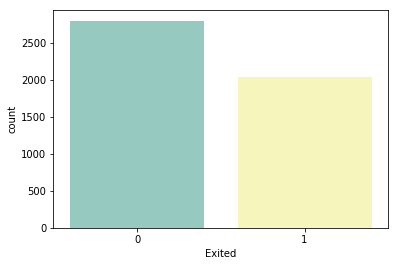

In [0]:
ax = seaborn.countplot(x='Exited', data=eq_df, palette='Set3')
df.loc[:,'Exited'].value_counts()
plt.show()

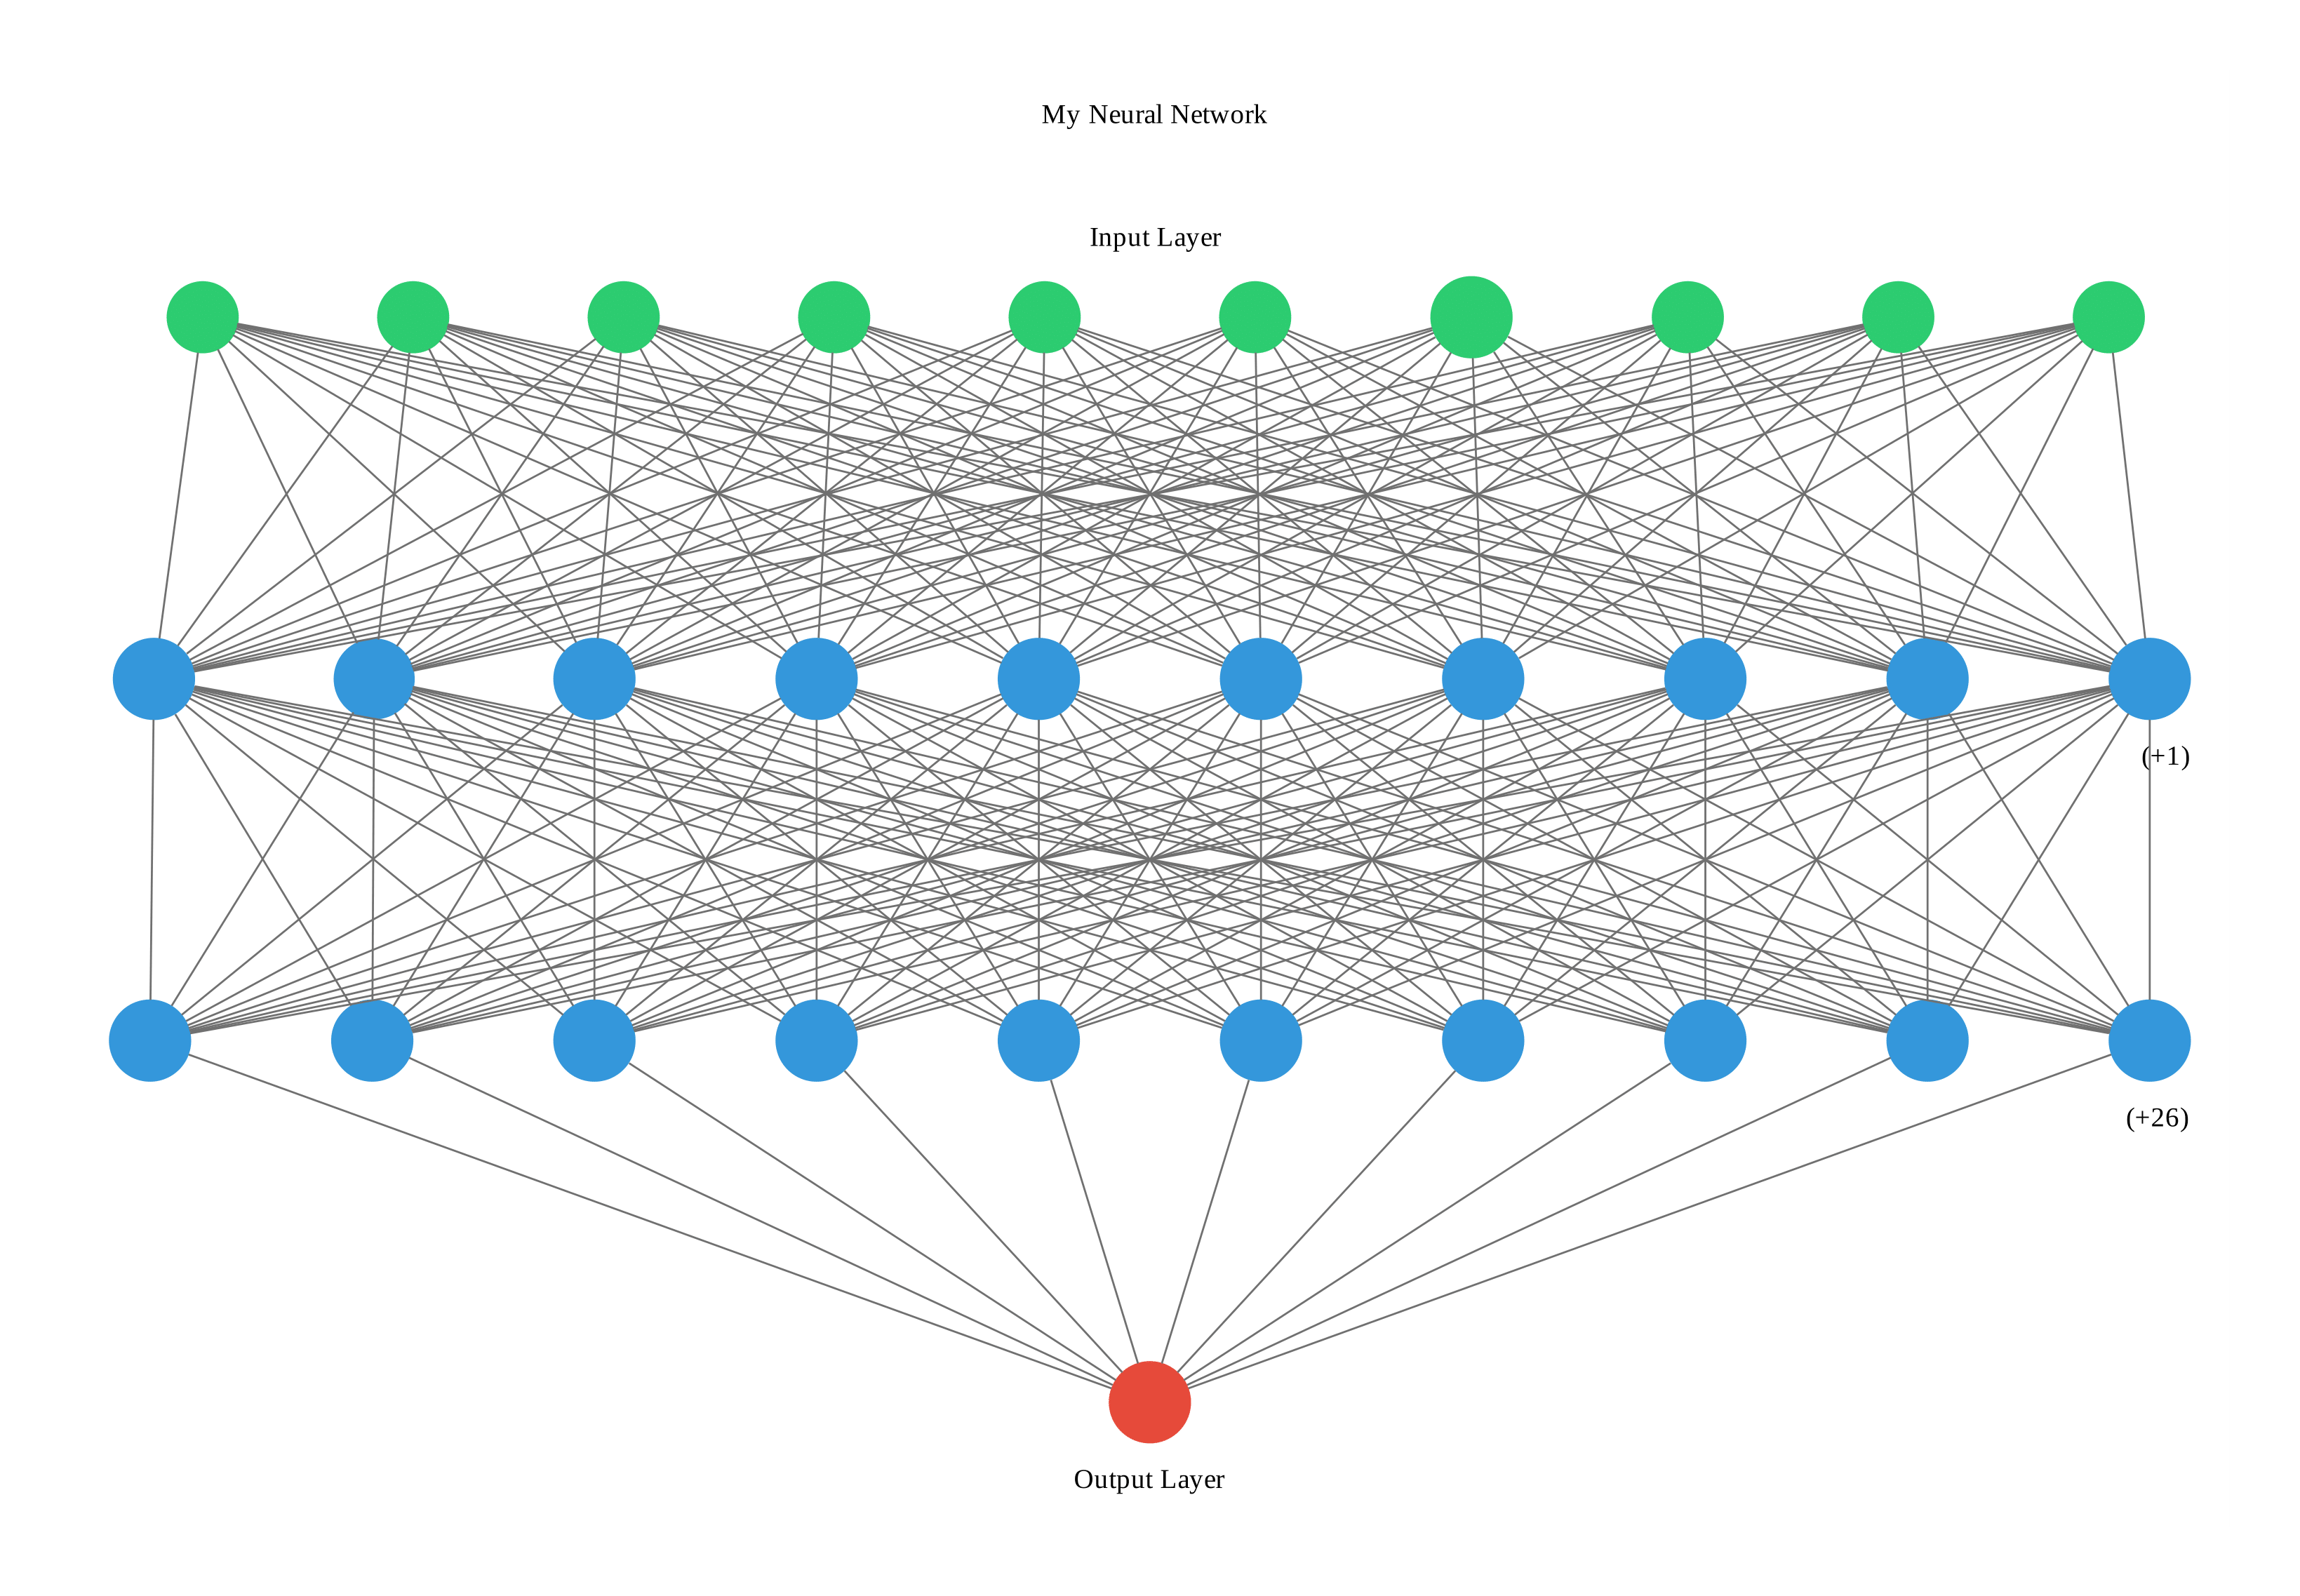

In [0]:
model=Sequential()
# Add an input layer shape depends on shape of X. We have 11 columns in X.
model.add(Dense(11, activation='relu', kernel_initializer=keras.initializers.glorot_normal(seed=None), input_shape=(10,)))
#glorot initializer  normal, uniform
#X.Glorot, Y.Benjo, Understanding the difficulty of deep feedforward neural networks
# Add one hidden layer 
model.add(Dense(36, activation='tanh', kernel_initializer=keras.initializers.glorot_normal(seed=None)))


# Add an output layer 
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='sgd',
              metrics=[keras_metrics.precision(), 'accuracy'])
                 


Image(filename=('model1-1.png'), width = 600, height=500)


In [0]:
history = model.fit(X_train_centered, y_train, validation_split=0.15, epochs = 25, batch_size=3, verbose=1)

Train on 3494 samples, validate on 617 samples
Epoch 1/25
3494/3494 [==============================] - 4s 1ms/step - loss: 0.6314 - precision: 0.5912 - acc: 0.6362 - val_loss: 0.5641 - val_precision: 0.7011 - val_acc: 0.7034
Epoch 2/25
3494/3494 [==============================] - 4s 1ms/step - loss: 0.5735 - precision: 0.6749 - acc: 0.7023 - val_loss: 0.5433 - val_precision: 0.6959 - val_acc: 0.7212
Epoch 3/25
3494/3494 [==============================] - 4s 1ms/step - loss: 0.5575 - precision: 0.6887 - acc: 0.7161 - val_loss: 0.5332 - val_precision: 0.6761 - val_acc: 0.7245
Epoch 4/25
3494/3494 [==============================] - 4s 1ms/step - loss: 0.5343 - precision: 0.6957 - acc: 0.7295 - val_loss: 0.5130 - val_precision: 0.7045 - val_acc: 0.7585
Epoch 5/25
3494/3494 [==============================] - 4s 1ms/step - loss: 0.5076 - precision: 0.7228 - acc: 0.7541 - val_loss: 0.5017 - val_precision: 0.7366 - val_acc: 0.7553
Epoch 6/25
3494/3494 [==============================] - 4s 1ms/

In [0]:
!pip install -q graphviz
!pip install -q ann_visualizer
from ann_visualizer.visualize import ann_viz
ann_viz(model, view=True, filename="model")

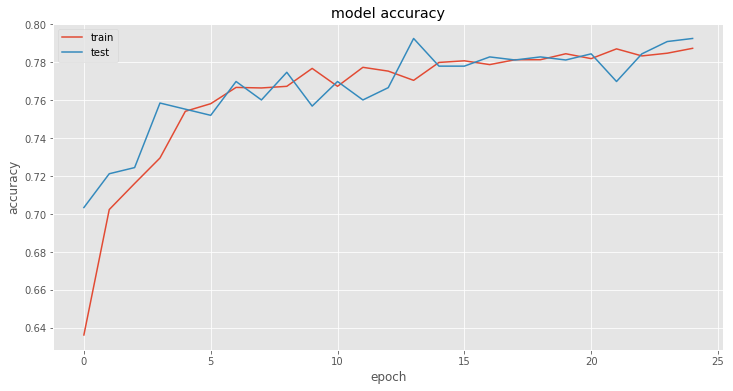

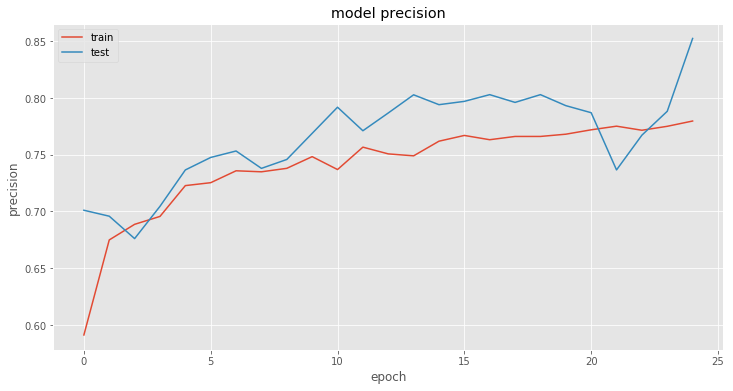

In [0]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
plt.figure(figsize = (12,6))
plt.plot(history.history['precision'])
plt.plot(history.history['val_precision'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

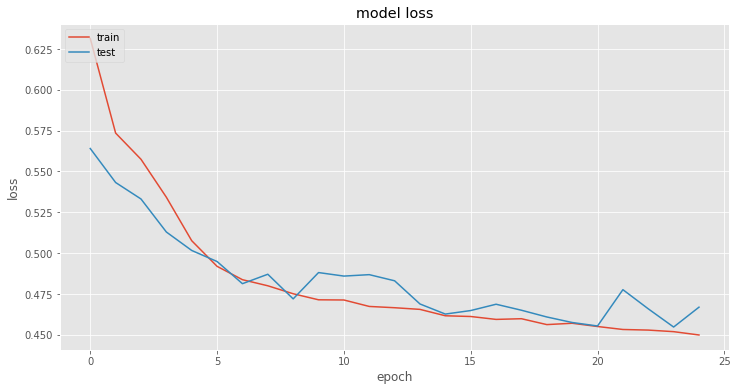

In [0]:
plt.style.use('ggplot')
plt.figure(figsize = (12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Performance Metrics**

**Confusion matrix**

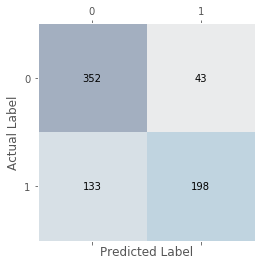

In [0]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict_classes(X_test_centered)
confmat = confusion_matrix(y_test,y_pred)
fig, ax = plt.subplots(figsize=(4, 4))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=.3)
plt.grid()
for i in range(confmat.shape[0]):
  for j in range(confmat.shape[1]):
    ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')
    
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

In [0]:
FP = confmat[1][0]   #false positive
TP = confmat[1][1]   #true positive
TN = confmat[0][0]   #true negative
FN = confmat[0][1]   #false negative

error = (FP+FN)/(FP+FN+TP+TN)*100
acc = (TP+TN)/(FP+FN+TP+TN)*100

ofp = FP/(FP+TN)*100   #true positive rate
opp = TP/(FN+TP)*100   #false positive rate

pre = TP/(TP+FP)*100   #precision
recall = TP/(FN+TP)*100 #recall (pełność)

print("Błąd %f%% " % error)
print("Dokładność %f%% " % acc)
print("Precision %f%% " % pre)
print("Recall %f%% " % recall)
print("True positive rate %f%% " % ofp)
print("False positive rate %f%% " % opp)

Błąd 24.242424% 
Dokładność 75.757576% 
Precision 59.818731% 
Recall 82.157676% 
True positive rate 27.422680% 
False positive rate 82.157676% 


**Rejected samples**

In [0]:
val_df = df.ix[random_list]
# split into input X and output y variables
X_val = (val_df.drop(['Exited'], axis = 1)) #dropping exited
y_val = val_df.Exited
#standardization
scaler=StandardScaler().fit(X_val)
X_val_centered = scaler.transform(X_val)
y_vpred = model.predict_classes(X_val_centered)
val_confmat = confusion_matrix(y_val,y_vpred)
val_FP = val_confmat[1][0]   #false positive
val_TP = val_confmat[1][1]   #true positive
val_TN = val_confmat[0][0]   #true negative
val_FN = val_confmat[0][1]   #false negative
val_error = (val_FP+val_FN)/(val_FP+val_FN+val_TP+val_TN)*100
val_acc = (val_TP+val_TN)/(val_FP+val_FN+val_TP+val_TN)*100
print("Ilość próbek %f, Poprawnie sklasyfikowane %f" %(int(len(y_val)), int(val_confmat[0][0])))
print("Błąd %f%% " % val_error)
print("Dokładność %f%% " % val_acc)

Ilość próbek 5163.000000, Poprawnie sklasyfikowane 3705.000000
Błąd 28.239396% 
Dokładność 71.760604% 


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
